In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In /Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/djbetts/opt/anaconda3/lib/

In [3]:
from src.ItemItemRecommender import ItemItemRecommender
from sklearn.model_selection import train_test_split

In [4]:
from datetime import datetime

In [5]:
#Current SQL query
"""
SELECT 
geo__country, 
#geo__city,
event_params__video_title,
event_params__videotitle,
event_name,
#COUNT(event_name) AS times_completed,
FROM `jfp-data-warehouse.production_firebase.firebase_event` 
WHERE geo__country in ('Afghanistan',
 'Algeria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Bhutan',
 'Brunei',
 'China',
 'Egypt',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Japan',
 'Jordan',
 'Kazakstan',
 'Kuwait',
 'Kyrgyzstan',
 'Laos',
 'Libya',
 'Malaysia',
 'Maldives',
 'Mali',
 'Mauritania',
 'Mongolia',
 'Morocco',
 'Myanmar',
 'Nepal',
 'Niger',
 'North Korea',
 'Oman',
 'Pakistan',
 'Palestine',
 'Qatar',
 'Russia',
 'Saudia Arabia',
 'Somalia',
 'Sri Lanka',
 'Sudan',
 'Syria',
 'Tajikistan',
 'Thailand',
 'Timor Leste',
 'Tunisia',
 'Turkey',
 'Turkmenistan',
 'UAE',
 'Uzbekistan',
 'Vietnam',
 'Yemen') AND 
event_params__video_title IS NOT NULL AND
event_name IN ('videostarts',  'videoplay',  'a_media_progress10',  'a_media_progress25',  'a_media_progress50',  'a_media_progress75',  'a_media_progress90') AND 
DATE(event_date_partition) 
BETWEEN  "2021-01-01" AND "2021-04-14" 
GROUP BY 
geo__country, 
geo__city,
event_params__videotitle, 
event_params__video_title,
event_name
ORDER BY 
geo__country,
event_params__video_title
#times_completed DESC 
LIMIT 16000
""";

In [84]:
data = pd.read_csv('/Users/djbetts/Desktop/jf_project/data/recommender_base_top_50.csv')

In [85]:
df = data.copy()
#df.drop(['geo__city', 'times_completed'], axis=1, inplace=True)

In [86]:
df.columns

Index(['geo__country', 'event_params__video_title', 'event_params__videotitle',
       'event_name'],
      dtype='object')

In [157]:
def merge_video(df):
    df['video_title'] = df['event_params__videotitle'].fillna(df['event_params__video_title'])
    df.drop(['event_params__videotitle','event_params__video_title'], axis=1, inplace=True)
    return df

In [170]:
def view_to_rating(event_name):
    d ={
        'videostarts':.01,
        'videoplay':.01, 
        'a_media_progress10':(1*.1),
        'a_media_progress25':(1*.25),
        'a_media_progress50':(1*.5), 
        'a_media_progress75':(1*.75), 
        'a_media_progress90':(1*.9)
    }
    
    return(d[event_name])

In [87]:
df['video_title'] = df['event_params__videotitle'].fillna(df['event_params__video_title'])

In [88]:
df.drop(['event_params__videotitle','event_params__video_title'], axis=1, inplace=True)

In [89]:
(df.geo__country.value_counts())

India          7243
Egypt          2810
China          2143
Bangladesh     2103
Algeria         621
Afghanistan     390
Bahrain         256
Azerbaijan      233
Bhutan          130
Brunei           71
Name: geo__country, dtype: int64

In [90]:
df.event_name.value_counts()

videoplay             2871
videostarts           2781
a_media_progress10    2408
a_media_progress25    2225
a_media_progress50    2048
a_media_progress75    1891
a_media_progress90    1776
Name: event_name, dtype: int64

<AxesSubplot:>

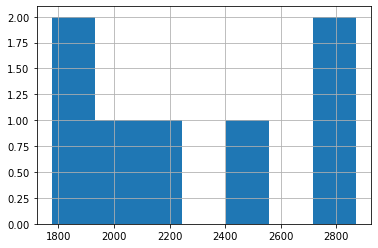

In [91]:
df.event_name.value_counts().hist(bins=7)

In [92]:
df.video_title.value_counts()

Baptism of Jesus by John    1161
Childhood of Jesus          1158
Birth of Jesus              1151
JESUS                        806
Chosen Witness               686
                            ... 
圣灵                             1
奮鬥與成就                          1
與耶穌的七日：恩典                      1
JÉSUS                          1
使徒行傳                           1
Name: video_title, Length: 435, dtype: int64

In [93]:
#df.video_title.hist(bins=435);

# 90% progress through video

In [94]:
#df_90 = df[df['event_name'] == 'a_media_progress90']

In [95]:
#df_90.video_title.unique()

In [96]:
#df_90.geo__country.value_counts()

In [97]:
#country_groupby = df.groupby('geo__country')

In [98]:
#country_groupby['video_title'].unique()

In [99]:
#india = country_groupby.get_group('India')

In [100]:
#falling_plates_india = india[india['video_title'] == '#FallingPlates']

In [101]:
#event_score = falling_plates_india.event_name.value_counts()

In [102]:
#event_score.index

In [103]:
#keys = df.video_title.unique()
#reviews = dict.fromkeys(keys, 0)

In [104]:
#tried to make a function by iterating through a groupby. couldn't figure it out.

# def rating_calculator(group):
#     rating = 0
#     reviews = dict.fromkeys(set(group.video_title), 0)
#     for event_name in group.event_name:
#         if event_name == 'videostarts' or event_name == 'videoplay':
#             reviews[group.video_title] += 1
#         elif event_name == 'a_media_progress10':
#             reviews[group.video_title] += (1 * .1)
#         elif event_name == 'a_media_progress25':
#             reviews[group.video_title] += (1 * .25)
#         elif event_name == 'a_media_progress50':
#             reviews[group.video_title] += (1 * .5)
#         elif event_name == 'a_media_progress75':
#             reviews[group.video_title] += (1 * .75)
#         elif event_name == 'a_media_progress90':
#             reviews[group.video_title] += (1 * .9)
#     print(f'total: {rating}\nnormalized: {rating/len(events)}')
#     return (reviews)
# #     return
# # print(rating)
# # print(rating/len(event_score))

In [105]:
#rating_calculator(event_score)

In [106]:
# #BROKEN
# def review_builder(country_groupby):
#     review_dic = dict.fromkeys(country_groupby.groups.keys(), None)
#     print(review_dic)
#     for country, group in country_groupby:
#         review_dic[country] = rating_calculator(group)
#     return review_dic

# function to return score. not normalized

In [108]:
#view_to_rating('a_media_progress90')

In [175]:
df['score'] = df.event_name.apply(view_to_rating)

In [110]:
df.drop(['event_name'], axis=1, inplace=True)

<AxesSubplot:>

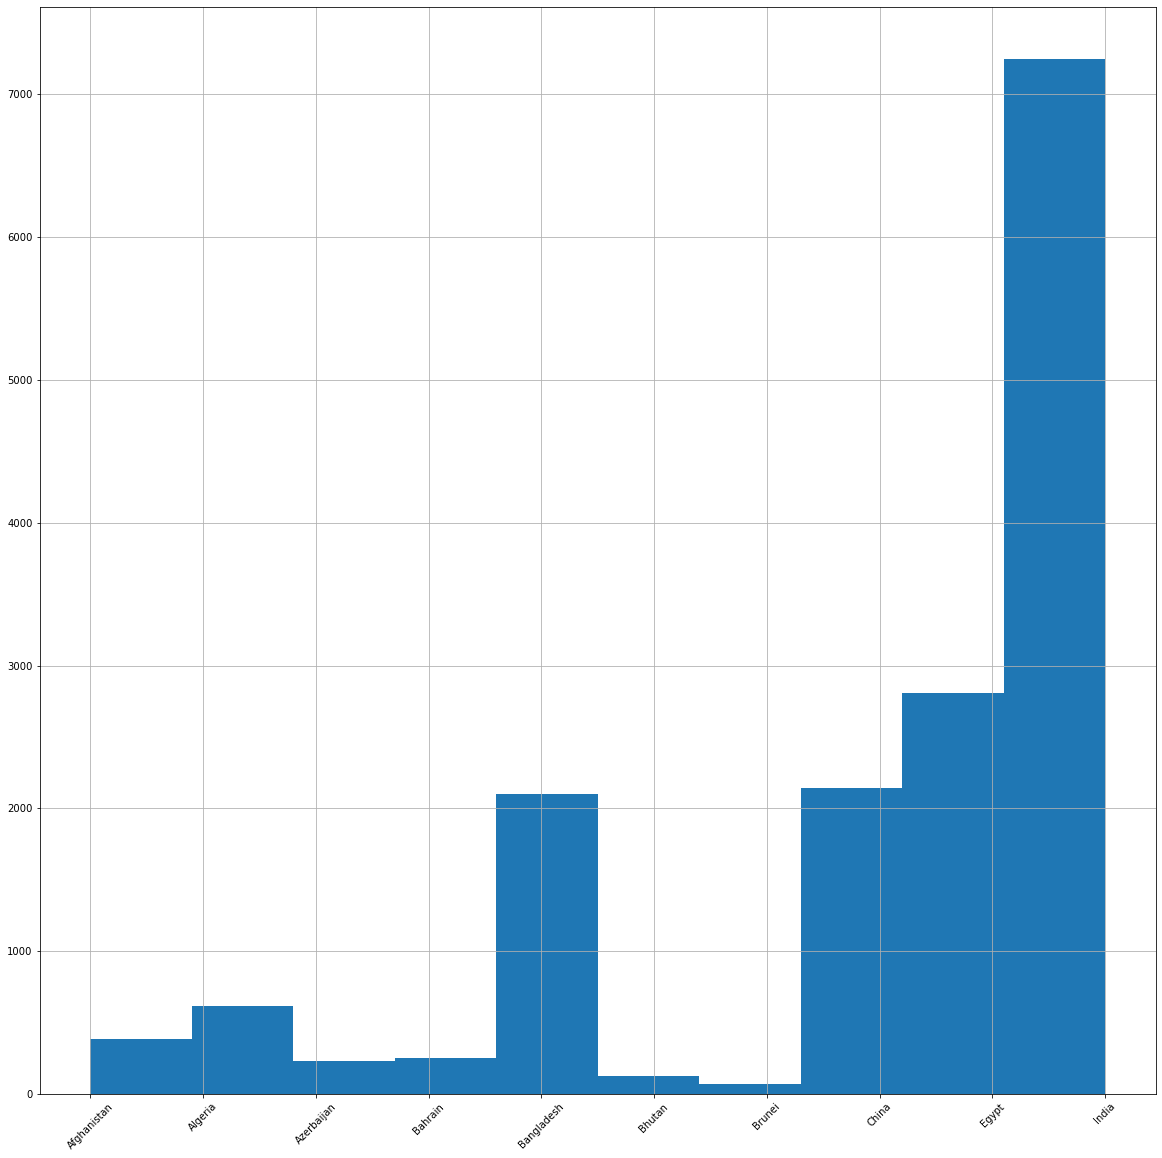

In [120]:
df.geo__country.hist(xrot=45, figsize=(20,20))

In [34]:
groupby = df.groupby(['geo__country','video_title'])

In [35]:
review_scores = groupby.sum()

In [36]:
review_scores.loc[('Bhutan', 'LUMO - John 21:1-25')]

score    0.12
Name: (Bhutan, LUMO - John 21:1-25), dtype: float64

In [148]:
#review_scores.score.plot.bar(figsize=(20,20));

In [37]:
review_scores.loc[('Bhutan','LUMO - John 21:1-25')]

score    0.12
Name: (Bhutan, LUMO - John 21:1-25), dtype: float64

In [135]:
review_scores.unstack()

score                                       \
video_title  #FallingPlates #फालिंगप्लेट्स  #掉落的盘子 1- في العائلة   
geo__country                                                       
Afghanistan            0.02             NaN    NaN           NaN   
Algeria                2.52             NaN    NaN           NaN   
Azerbaijan             2.52             NaN    NaN           NaN   
Bahrain                 NaN             NaN    NaN           NaN   
Bangladesh             5.41             NaN    NaN           NaN   
Bhutan                 0.02             NaN    NaN           NaN   
Brunei                  NaN             NaN    NaN           NaN   
China                  5.04             NaN   7.56           NaN   
Egypt                  5.45             NaN    NaN          0.12   
India                 43.72            0.03    NaN           NaN   

                                                                       \
video_title  1. Jesus, Our Loving Pursuer 1.가족 중에 1.우리의 사랑의 추구자이신 예수님   
geo__country                                                            
Afghanistan                           NaN     NaN                 NaN   
Algeria                               NaN     NaN                 NaN   
Azerbaijan                            NaN     NaN                 NaN   
Bahrain                               NaN     NaN                 NaN   
Bangladesh                           2.52     NaN                 NaN   
Bhutan                                NaN     NaN                 NaN   
Brunei                                NaN     NaN                 NaN   
China                                 NaN     NaN                 NaN   
Egypt                                 NaN     NaN                 NaN   
India                               17.67    0.02                0.01   

                                                          \
video_title  2- عمل يدوي 2. Jesus, Our Gracious Forgiver   
geo__country                                               
Afghanistan          NaN                             NaN   
Algeria              NaN                             NaN   
Azerbaijan           NaN                             NaN   
Bahrain              NaN                             NaN   
Bangladesh           NaN                            1.62   
Bhutan               NaN                             NaN   
Brunei               NaN                             NaN   
China                NaN                             NaN   
Egypt               0.12                            2.69   
India                NaN                            9.18   

                                             ...                            \
video_title  3. Jesus, Our Power for Living  ... 路加福音简介 身份错认于路司得 返回叙利亚的安提阿   
geo__country                                 ...                             
Afghanistan                             NaN  ...    NaN      NaN       NaN   
Algeria                                 NaN  ...    NaN      NaN       NaN   
Azerbaijan                              NaN  ...    NaN      NaN       NaN   
Bahrain                                 NaN  ...    NaN      NaN       NaN   
Bangladesh                              NaN  ...    NaN      NaN       NaN   
Bhutan                                  NaN  ...    NaN      NaN       NaN   
Brunei                                  NaN  ...    NaN      NaN       NaN   
China                                   NaN  ...   2.89     2.52      2.52   
Egypt                                   NaN  ...    NaN      NaN       NaN   
India                                  5.04  ...    NaN      NaN       NaN   

                                                                             
video_title  选出马提亚替代犹大 那些使人犯罪的人有祸了 钉在十字架上的囚犯 雅典的偶像 非斯都咨询亚基帕王 高贵的比里亚人 魔鬼引诱耶稣  
geo__country                                                                 
Afghanistan        NaN         NaN       NaN   NaN       NaN     NaN    NaN  
Algeria            NaN         NaN       NaN   NaN       NaN     NaN    NaN  
A

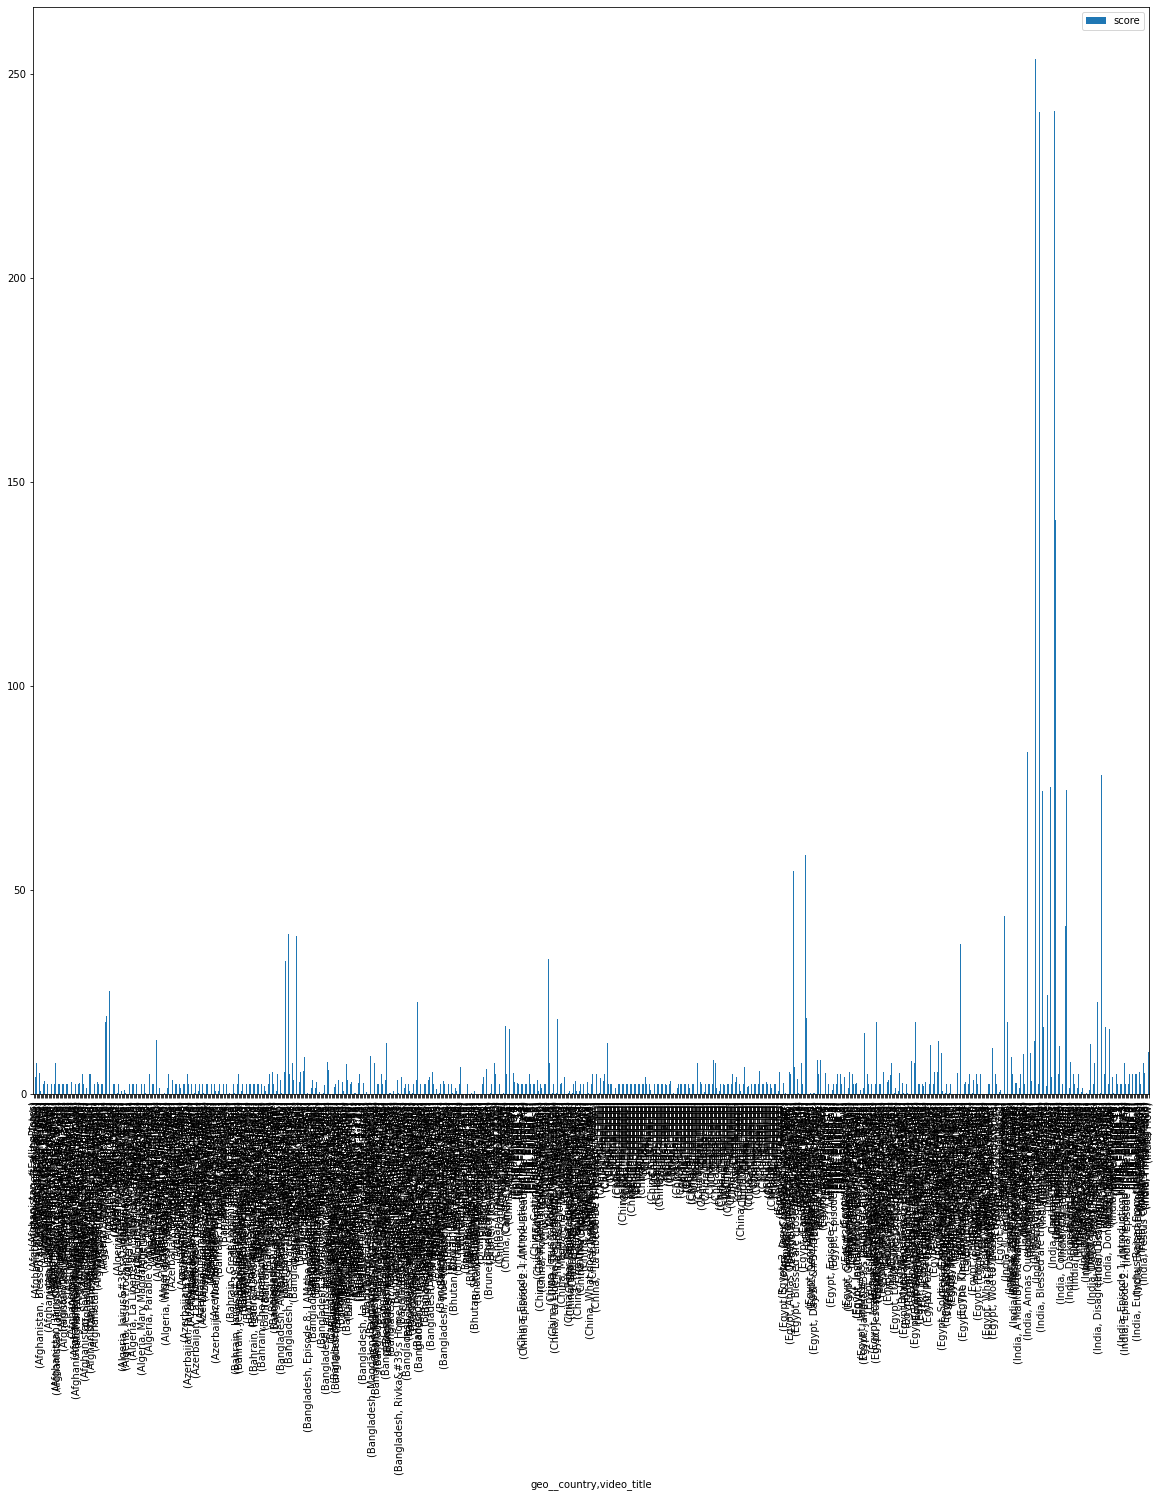

In [147]:
review_scores.plot.bar(figsize=(20,20));

In [38]:
review_scores.index

MultiIndex([('Afghanistan',                         '#FallingPlates'),
            ('Afghanistan',                     'Angels at the Tomb'),
            ('Afghanistan',               'Baptism of Jesus by John'),
            ('Afghanistan',                             'Beatitudes'),
            ('Afghanistan',                         'Birth of Jesus'),
            ('Afghanistan',    'Blessed are those Who Hear and Obey'),
            ('Afghanistan',                                'Breathe'),
            ('Afghanistan',                        'Burial of Jesus'),
            ('Afghanistan',                     'Childhood of Jesus'),
            ('Afghanistan',                         'Chosen Witness'),
            ...
            (      'India',                              'Episode 9'),
            (      'India', 'Eutychus Raised From the Dead at Troas'),
            (      'India',        'Explanation of Miraculous Birth'),
            (      'India',                           'Fallin

In [39]:
from scipy import sparse
from scipy.sparse import csr_matrix

In [40]:
df_sparce = df.pivot_table(columns='video_title', values='score', index='geo__country', aggfunc='mean', fill_value=0)
movie_list = pd.Series(df_sparce.columns)
users = pd.Series(df_sparce.index)

In [41]:
df_sparce.shape

(10, 435)

In [42]:
number_ratings = (df_sparce.values > 0).sum()
density = number_ratings / (df_sparce.shape[0] * df_sparce.shape[1])
print('The desnsity is: {} '.format(density))

The desnsity is: 0.19057471264367817 


Min number of ratings: 9


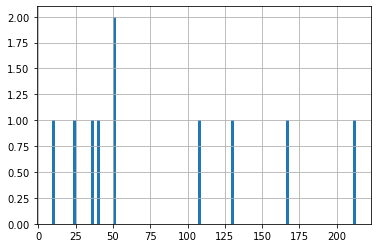

In [43]:
ratings = (df_sparce > 0).sum(axis=1)
ratings.hist(bins=100)
print('Min number of ratings: {}'.format(ratings.min()))

Min number of ratings: 1


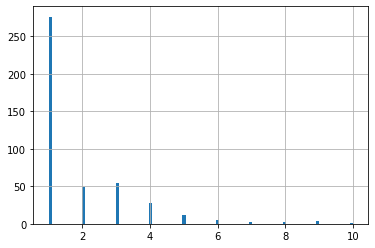

In [44]:
ratings = (df_sparce > 0).sum(axis=0)
ratings.hist(bins=100)
print('Min number of ratings: {}'.format(ratings.min()))

# utility matric

In [45]:
df_sparce.index

Index(['Afghanistan', 'Algeria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Bhutan', 'Brunei', 'China', 'Egypt', 'India'],
      dtype='object', name='geo__country')

In [75]:
train, test = train_test_split(df_sparce.values, random_state = 100)

In [76]:
ratings_as_mat = csr_matrix(df_sparce.values, (df_sparce.index.shape[0], df_sparce.columns.shape[0]))

In [77]:
print(train.shape)
print(test.shape)
print(df_sparce.shape)

(7, 435)
(3, 435)
(10, 435)


In [78]:
ratings_as_mat.shape

(10, 435)

In [136]:
rec = ItemItemRecommender(neighborhood_size=75)
rec.fit(ratings_as_mat)

In [141]:
users

0    Afghanistan
1        Algeria
2     Azerbaijan
3        Bahrain
4     Bangladesh
5         Bhutan
6         Brunei
7          China
8          Egypt
9          India
Name: geo__country, dtype: object

In [140]:
print(users[3])
rec.pred_one_user(user_id=3)

Bahrain


array([0.19406524, 0.04      , 0.        , 0.04      , 0.02531806,
       0.04      , 0.04      , 0.04      , 0.05164735, 0.04      ,
       0.04      , 0.        , 0.04      , 0.04      , 0.10069525,
       0.09646734, 0.        , 0.04      , 0.04      , 0.28354756,
       0.04      , 0.04      , 0.04      , 0.20818483, 0.05575517,
       0.18618744, 0.04      , 0.05256406, 0.09733891, 0.25741687,
       0.18319451, 0.04      , 0.27264748, 0.04      , 0.15020326,
       0.04      , 0.04      , 0.32832103, 0.19767748, 0.24234841,
       0.20990314, 0.04      , 0.12162239, 0.19528045, 0.24455143,
       0.04      , 0.04      , 0.04      , 0.04      , 0.04      ,
       0.04      , 0.27779905, 0.25869193, 0.04      , 0.04      ,
       0.04      , 0.04      , 0.04      , 0.04      , 0.04      ,
       0.04      , 0.04      , 0.04      , 0.04      , 0.04      ,
       0.04      , 0.04      , 0.04      , 0.04      , 0.04      ,
       0.04      , 0.04      , 0.04      , 0.04      , 0.04   

In [138]:
v

Execution time: 0.685672 seconds


# top rated movies

In [ ]:
average_rating = df.groupby('video_title').mean()['score']

In [ ]:
average_rating.sort_values(ascending=False)

# utility matrix work

In [ ]:
index = df.geo__country.unique()

In [ ]:
columns = df.video_title.unique()

In [ ]:
data = np.zeros((index.shape[0], columns.shape[0]))

In [ ]:
reviews = pd.DataFrame(data, index=index, columns=columns)

In [ ]:
reviews

In [ ]:
df.head()

# geo__city runthrough

In [201]:
data = pd.read_csv('/Users/djbetts/Desktop/jf_project/data/recommender_top50_geo__city.csv')

In [202]:
df = data.copy()

In [203]:
df['score'] = df['event_name'].apply(view_to_rating)

In [204]:
df_city = merge_video(df)

In [205]:
df_city = df_city[(df_city.geo__city != '(not set)')]

In [206]:
df_city = df_city.drop(['event_name'], axis=1)

In [213]:
df_city.columns

Index(['geo__city', 'score', 'video_title'], dtype='object')

In [211]:
#df_city.geo__city.hist(xrot=45, figsize=(20,20))

# write funtion to extract scores

In [216]:
city_groupby = df_city.groupby(['geo__city', 'video_title'])

In [217]:
city_reviews = city_groupby.sum()

# write funtion to convert df to matrix

In [ ]:
df_sparce = df_city.pivot_table(columns='video_title', values='score', index='geo__city', aggfunc='mean', fill_value=0)
movie_list = pd.Series(df_sparce.columns)
users = pd.Series(df_sparce.index)

In [242]:
def df_2_pivot(df, user_tag, item_tag='video_title', data='score'):
    pivot_table = df.pivot_table(columns=item_tag, values=data, index=user_tag, aggfunc='mean', fill_value=0)
    video_list = pd.Series(pivot_table.columns)
    users = pd.Series(pivot_table.index)
    
    number_ratings = (pivot_table.values > 0).sum()
    density = number_ratings / (pivot_table.shape[0] * pivot_table.shape[1])
    print('The desnsity is: {} '.format(density))
    
    return (pivot_table, video_list, users)

In [243]:
(city_pivot, city_video_list, cities) = df_2_pivot(df_city, user_tag='geo__city')

The desnsity is: 0.018972917400588096 


In [250]:
city_pivot.shape

(379, 367)

In [254]:
# ratings = (city_pivot > 0).sum(axis=1)
# ratings.hist(bins=100)
# print('Min number of ratings: {}'.format(ratings.min()))

In [255]:
ratings_as_mat = csr_matrix(city_pivot.values, 
                            (city_pivot.index.shape[0], 
                             city_pivot.columns.shape[0]))

In [268]:
train, test = train_test_split(ratings_as_mat, random_state = 100)

In [273]:
rec = ItemItemRecommender(neighborhood_size=75)
rec.fit(train)

In [281]:
print(cities[3])
predict = rec.pred_one_user(user_id=3)

Agartala


In [297]:
top10 = predict.argsort()[-10:]

In [298]:
predict[top10]

array([0.36, 0.36, 0.36, 0.36, 0.36, 0.36, 0.36, 0.36, 0.36, 0.36])

In [299]:
city_video_list[top10]

295      保罗终于抵达罗马
330            流动
294      保罗于马尔他上岸
332         石攻司提反
333     神的国像一粒芥菜种
293     保罗于腓斯都前受审
292    保罗于罗马看守下传道
310        大使命和升天
288            介绍
298            兄弟
Name: video_title, dtype: object

In [276]:
rec.pred_all_users(report_run_time=True);

Execution time: 16.836597 seconds
